In [2]:
import pandas as pd
import os
import numpy as np
from IPython.display import display,display_html
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
os.chdir(r'X:\Priyabrata\NoSHOW\demand-forecasting-kernels-only')

In [3]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [35]:
#The training dataset contains 5 years of daily
#sales volumes of 50 items in 10 stores 
#(500 time series in total, from 2013 to 2017).

train = pd.read_csv('train.csv',parse_dates=['date'])
test = pd.read_csv('test.csv',parse_dates=['date'])
train.sales = train.sales.astype(np.float)
#test.sales = test.sales.astype(np.float)
display_side_by_side(train.head(),test.head())

#The goal is to predict sales volumes of all items 
#in all stores in the first quarter of 2018. 
#The evaluation metric is SMAPE:average 2|yi−yi^|/(yi+yi^)⋅100%.

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0
,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1


In [5]:
#Data could be non-stationary
#Sales in stores could be correlated
#Data could have trend and seasonality
#Distribution may change based on time
display(pd.concat([train.isnull().sum().rename('Training NaNs'),
                   test.isnull().sum().rename('Test NaNs')], axis=1))

,Training NaNs,Test NaNs
date,0.0,0.0
id,NaN,0.0
item,0.0,0.0
sales,0.0,NaN
store,0.0,0.0


In [36]:
#Creating date attributes
#train.reset_index()
train['Week']=train['date'].dt.week
train['Month']=train['date'].dt.month
train['Quarter']=train['date'].dt.quarter
train['Year']=train['date'].dt.year
train['Day']=train['date'].dt.day_name()
train['DayofWeek']=train['date'].dt.weekday
train['days']=train['date'].dt.day
train.head()

,date,store,item,sales,Week,Month,Quarter,Year,Day,DayofWeek,days
0,2013-01-01,1,1,13.0,1,1,1,2013,Tuesday,1,1
1,2013-01-02,1,1,11.0,1,1,1,2013,Wednesday,2,2
2,2013-01-03,1,1,14.0,1,1,1,2013,Thursday,3,3
3,2013-01-04,1,1,13.0,1,1,1,2013,Friday,4,4
4,2013-01-05,1,1,10.0,1,1,1,2013,Saturday,5,5


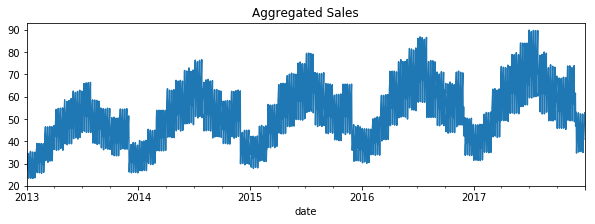

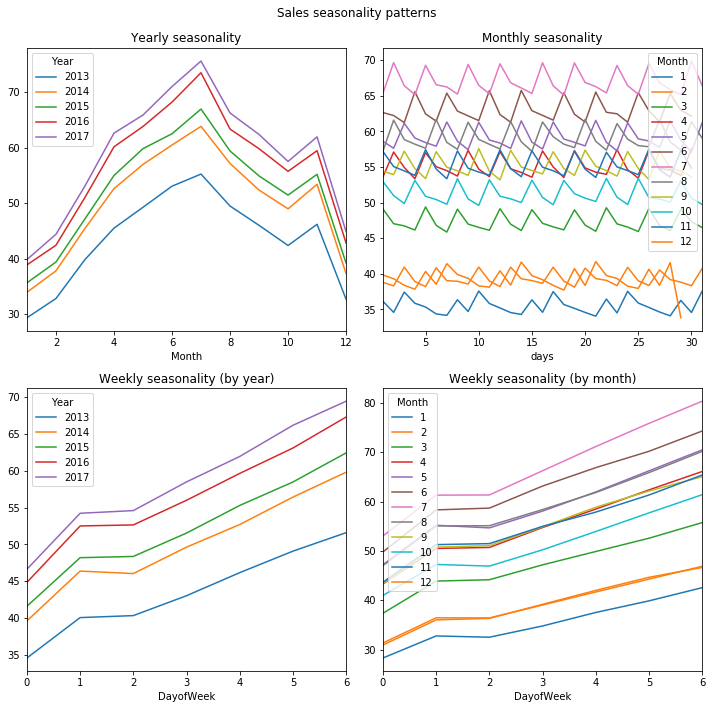

In [7]:
#Analysing seasonality pattern
train.groupby('date').mean()['sales'].plot(figsize=(10,3),title='Aggregated Sales');
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
_ = pd.pivot_table(train, values='sales', columns='Year', index='Month').plot(title="Yearly seasonality", ax=ax[0,0])
_ = pd.pivot_table(train, values='sales', columns='Month', index='days').plot(title="Monthly seasonality", ax=ax[0,1])
_ = pd.pivot_table(train, values='sales', columns='Year', index='DayofWeek').plot(title="Weekly seasonality (by year)", ax=ax[1,0])
_ = pd.pivot_table(train, values='sales', columns='Month', index='DayofWeek').plot(title="Weekly seasonality (by month)", ax=ax[1,1])
fig.suptitle('Sales seasonality patterns')
fig.tight_layout(rect=[0, 0, 1, 0.96])

In [37]:
train = train.set_index('date')
train.index = pd.to_datetime(train.index)
train.head()

,store,item,sales,Week,Month,Quarter,Year,Day,DayofWeek,days
date,,,,,,,,,,
2013-01-01,1,1,13.0,1,1,1,2013,Tuesday,1,1
2013-01-02,1,1,11.0,1,1,1,2013,Wednesday,2,2
2013-01-03,1,1,14.0,1,1,1,2013,Thursday,3,3
2013-01-04,1,1,13.0,1,1,1,2013,Friday,4,4
2013-01-05,1,1,10.0,1,1,1,2013,Saturday,5,5


<Figure size 432x288 with 0 Axes>

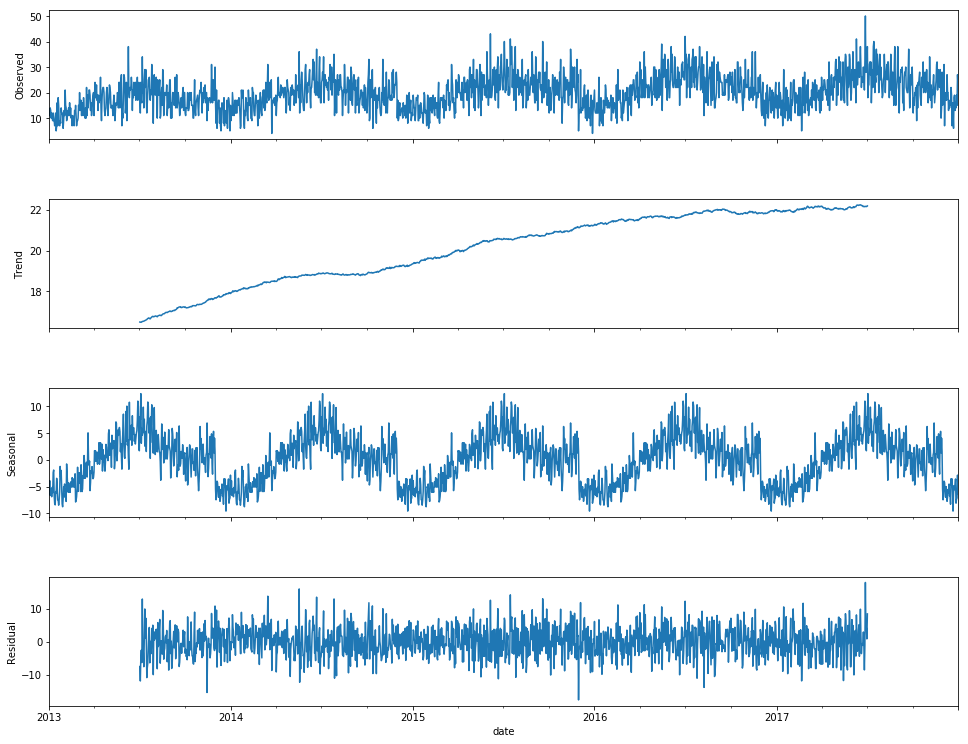

In [13]:
#Trend, Seasonality and Residual decomposition for sales in 1 store
from statsmodels.tsa.seasonal import seasonal_decompose
train['sales'] = train['sales'].astype(float)
train = train[train['store']==1]
train = train[train['item']==1]
result = seasonal_decompose(train['sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [38]:
train.head()

,store,item,sales,Week,Month,Quarter,Year,Day,DayofWeek,days
date,,,,,,,,,,
2013-01-01,1,1,13.0,1,1,1,2013,Tuesday,1,1
2013-01-02,1,1,11.0,1,1,1,2013,Wednesday,2,2
2013-01-03,1,1,14.0,1,1,1,2013,Thursday,3,3
2013-01-04,1,1,13.0,1,1,1,2013,Friday,4,4
2013-01-05,1,1,10.0,1,1,1,2013,Saturday,5,5


In [42]:
#Non-stationarity Test and visualization
from statsmodels.tsa.stattools import adfuller

def test_stationarity(data,window,cutoff=0.05):
    rolmean = data.rolling(window).mean()
    rolstd = data.rolling(window).std()
    
    #plotting statistics
    plt.figure(figsize=(12,8))
    original = plt.plot(data,color='red',label='Original data')
    rollingmean = plt.plot(rolmean,color='blue',label='Rolling Mean')
    rollingstd = plt.plot(rolstd,color ='green',label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Comparison between Rolling Mean & Std')
    plt.show()
    
    #Dickey Fuller Test
    df = adfuller(data,autolag='AIC',maxlag= 20)
    #dfmean = adfuller(rolmean,autolag='AIC',maxlag= 20)
    #dfstd = adfuller(rolstd,autolag='AIC',maxlag= 20)
    output=pd.Series(df[0:4],index=['Test Statistics',
                             'p-value',
                             'Lags used',
                             'Number of observations'])
    outputdf =pd.DataFrame(output)
    print(outputdf)
    #print('ADF test for original data ',df)
    #print('ADF test for Rolling Mean data ',dfmean)
    #print('ADF test for Rolling Std data ',dfstd)

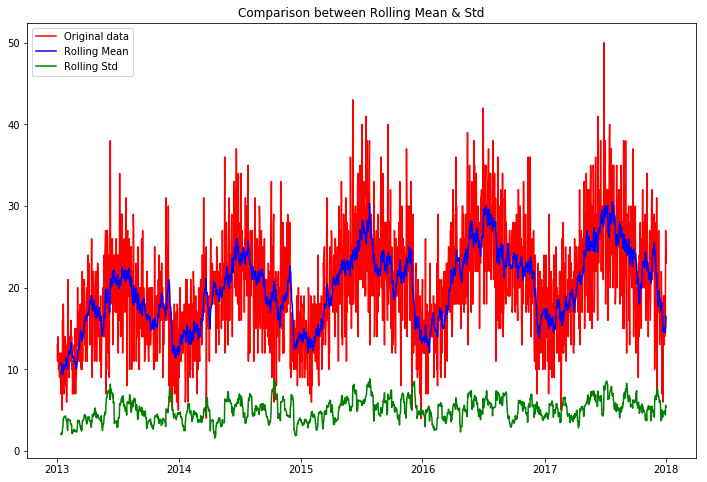

                                  0
Test Statistics           -2.987278
p-value                    0.036100
Lags used                 20.000000
Number of observations  1805.000000


In [43]:
test_stationarity(train['sales'][(train['store']==1)&(train['item']==1)],12,0.01)

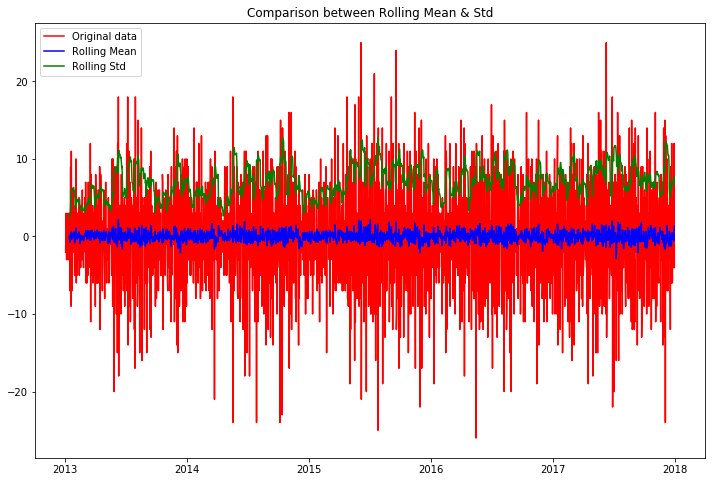

                                   0
Test Statistics        -1.520810e+01
p-value                 5.705031e-28
Lags used               2.000000e+01
Number of observations  1.804000e+03


In [55]:
#Stationarity test after 1st difference
store=pd.DataFrame(train['sales'][(train['store']==1)&(train['item']==1)])
#store['firstdiff'] = store.sales-store.sales.shift(1)
store.dropna(inplace=True)
store['diff'] = store['sales'] - store['prevsales']
test_stationarity(store['firstdiff'],12,0.01)

In [121]:
#Intuition bethind ACF and PACF
#Present day sales could be due to past sales
#Similarly, future sales could be due to present day sales
#Sales at present are correlated to past sales
#ACF = Autocorrelation of sales at present and
#sales at different lags

#PACF: There are still some residuals 
#that carry correlation information with 
#previous sales. Both PACF and ACF 
#says how many factors to be taken
#into the model

from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#ACF Plot for stationary sales for store 1

def createACFandPACF(timeseries,lags=40):
    #print('ACF Values :', acf(store['firstdiff']),
          #' PACF Values :' ,pacf_ols(store['firstdiff'],nlags=20))

    plt.figure(figsize=(10,5));
    plt.title('ACF & PACF of stationary sales records')
    firstplot = lag_plot(store['firstdiff']);
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 4))
    _=plot_acf(timeseries,lags=lags,title = 'ACF Plot for 40 Lags',color='red',ax=ax[0])
    _=plot_pacf(timeseries, lags=lags,title = 'PACF Plot for 40 Lags',color='green',ax=ax[1])
    
    fig.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()
    

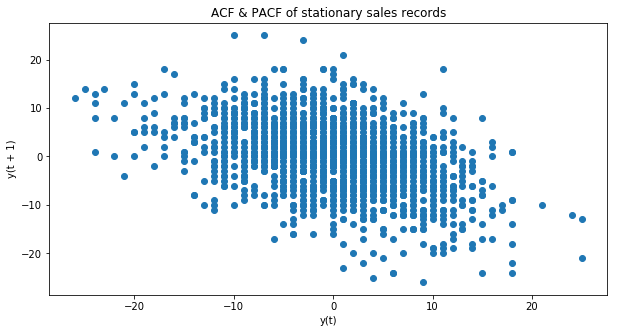

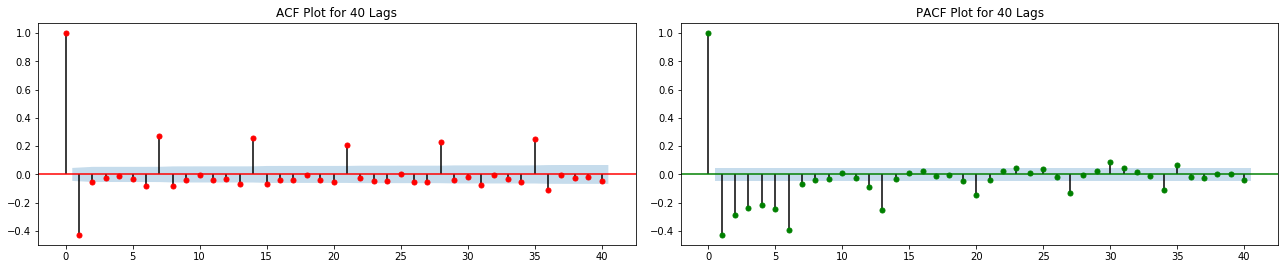

In [122]:
createACFandPACF(store['firstdiff'],lags=40)
#Since there are some weekly pattern 
#Seasonality should be taken into account
#SARIMA model will be build

In [140]:
#ARIMA MODEL
import statsmodels.api as sm 
model = sm.tsa.ARIMA(store.firstdiff,(6,0,1)).fit(disp=False)
#AR1fit=model.fit(maxlag=1)
#AR2fit=model.fit(maxlag=2)
#print('AIC for lag1 :',AR1fit.aic)
#print('AIC for lag2 :',AR2fit.aic)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:              firstdiff   No. Observations:                 1825
Model:                     ARMA(6, 1)   Log Likelihood               -5592.108
Method:                       css-mle   S.D. of innovations              5.179
Date:                Fri, 06 Mar 2020   AIC                          11202.216
Time:                        16:36:46   BIC                          11251.800
Sample:                    01-02-2013   HQIC                         11220.507
                         - 12-31-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0038      0.023      0.166      0.868      -0.041       0.049
ar.L1.firstdiff    -0.6344      0.059    -10.801      0.000      -0.750      -0.519
ar.L2.firstdiff    -0.6173      

In [139]:
#SARIMA MODEL
import statsmodels.api as sm 
model = sm.tsa.SARIMAX(store.firstdiff, trend='n', order=(6,0,1)).fit(disp=False)
#AR1fit=model.fit(maxlag=1)
#AR2fit=model.fit(maxlag=2)
#print('AIC for lag1 :',AR1fit.aic)
#print('AIC for lag2 :',AR2fit.aic)
print(model.summary())

                           Statespace Model Results                           
Dep. Variable:              firstdiff   No. Observations:                 1825
Model:               SARIMAX(6, 0, 1)   Log Likelihood               -5592.122
Date:                Fri, 06 Mar 2020   AIC                          11200.244
Time:                        16:36:21   BIC                          11244.318
Sample:                    01-02-2013   HQIC                         11216.502
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6343      0.050    -12.728      0.000      -0.732      -0.537
ar.L2         -0.6173      0.039    -15.630      0.000      -0.695      -0.540
ar.L3         -0.5795      0.036    -16.016      0.0

In [141]:
#SARIMA MODEL
import statsmodels.api as sm 
model = sm.tsa.SARIMAX(store.firstdiff, trend='n', order=(6,0,0)).fit(disp=False)
#AR1fit=model.fit(maxlag=1)
#AR2fit=model.fit(maxlag=2)
#print('AIC for lag1 :',AR1fit.aic)
#print('AIC for lag2 :',AR2fit.aic)
print(model.summary())

                           Statespace Model Results                           
Dep. Variable:              firstdiff   No. Observations:                 1825
Model:               SARIMAX(6, 0, 0)   Log Likelihood               -5597.679
Date:                Fri, 06 Mar 2020   AIC                          11209.359
Time:                        16:41:27   BIC                          11247.924
Sample:                    01-02-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

In [ ]:
#Best model out of the three 
#is

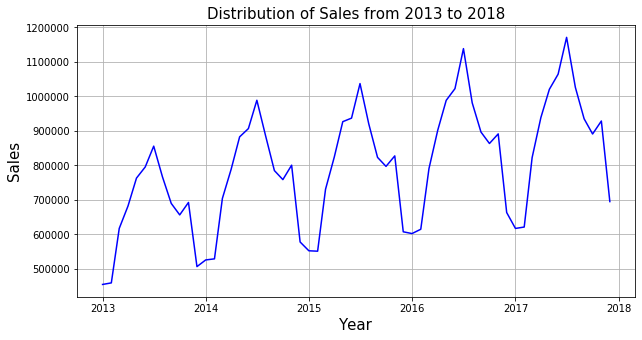

In [192]:
#STL Decomposition of Monthly aggregated sales
#Transform the data into monthly average
train['Newdate']=train['date'].dt.year.astype('str')+'-'+train['date'].dt.month.astype('str')+'-'+'01'
train['Newdate'] = pd.to_datetime(train['Newdate'])
sales=train.groupby('Newdate')['sales'].sum().reset_index()
#result = seasonal_decompose(sales['sales'], model='additive')
#result.plot();
#sales.head()
#result.seasonality


plt.figure(figsize=(10,5))
plt.title('Distribution of Sales from 2013 to 2018',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Year',fontsize=15)
color = 'blue'
plt.grid()
plt.axis('on')
#sales.plot(x='date',y='sales',color = color);
plt.plot(sales['Newdate'],sales['sales'],color=color);

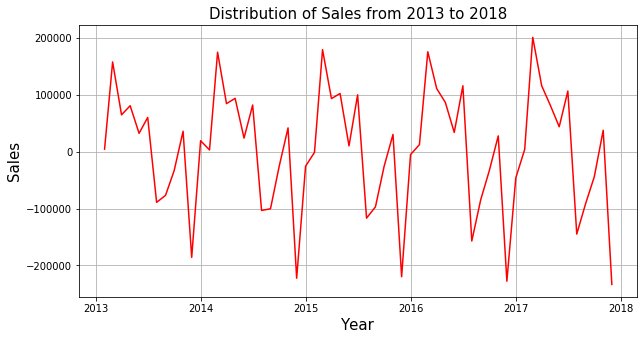

In [193]:
#Since the data is not stationary
#using differencing method to 
#convert into stationary data
#add previous sales to the next row
sales['prev_sales'] = sales['sales'].shift(1)
sales=sales.dropna()
sales['diff']=sales['sales'] - sales['prev_sales']


plt.figure(figsize=(10,5))
plt.title('Distribution of Sales from 2013 to 2018',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Year',fontsize=15)
#color = plt.cm.PuOr(np.linspace(0, 1, 25))
color='red'
plt.grid()
plt.axis('on')
#sales.plot(x='date',y='sales',color = color);
plt.plot(sales['Newdate'],sales['diff'],color=color);

In [194]:
#sales.head()
#sales =sales.set_index('Newdate')
#sales.index=pd.to_datetime(sales.index)
sales.head()

,Newdate,sales,prev_sales,diff
1,2013-02-01,459417.0,454904.0,4513.0
2,2013-03-01,617382.0,459417.0,157965.0
3,2013-04-01,682274.0,617382.0,64892.0
4,2013-05-01,763242.0,682274.0,80968.0
5,2013-06-01,795597.0,763242.0,32355.0


In [195]:
#We need to use previous monthly sales data to 
#forecast the next ones. The look-back period may 
#vary for every model. Ours will be 12 for this example
for i in range(1,13):
    field_name='lag_'+str(i)
    sales[field_name]=sales['diff'].shift(i)

In [196]:
#drop null values
sales = sales.dropna().reset_index(drop=True)
sales.head()

,Newdate,sales,prev_sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2014-02-01,529117.0,525987.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,2014-03-01,704301.0,529117.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,2014-04-01,788914.0,704301.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,2014-05-01,882877.0,788914.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,2014-06-01,906842.0,882877.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


In [ ]:
traindata = sales.drop(columns=['N'])

In [1]:
#LSTM with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#Scaling the date
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
train_data_normalized = scaler.fit(sales.resha)